# 사이킷런으로 수행하는 타이타닉 생존자 예측

### 타이타닉 생존자 예측 모델
- 사용 데이터 세트 : 타이타닉 탑승자 데이터 세트  
- 데이터 세트 분리 : 학습용 데이터 세트 80%, 테스트용(평가용) 데이터 세트 20%  
- 사용하는 ML 알고리즘  
    - 의사결정 트리 DecisionTreeClassifier
    - 랜덤 포레스트 : RandomForestClassifier
    - 로지스틱 회귀(분류): LogisticRegression  
- 모델 평가 : 예측 성능 평가 - 정확도  

캐글에서 제공하는 타이타틱 탑승자 데이터 기반으로
생존자 예측을 사이킷런으로 수행

타이타닉 생존자 데이터
- 머신러닝에 입문하는 데이터 분석가/과학자를 위한 기초 예제로 제공
- 많은 캐글 이용자가 자신의 방법으로 타이타닉 생존자 예측을 수행하고
- 수행 방법을 캐글에 공유

캐글 : 데이터 분석 오픈 포탈  
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관
    

### 타이타닉 생존자 예측 프로세스  
---
- 데이터 정보 확인
    - (1) 데이터 세트 로드 및 확인 : 타이타닉 탑승자 데이터 세트 
- 데이터 가공
    - (2) 데이터 가공 (전처리)   
    - 생존자 파악  
- 생존자 예측 
    - (3) 데이터 세트 준비 : 피처 데이터 세트 / 레이블 데이터 세트  
        - 결정값 데이터 세트 만들기 
    - (4) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트  
    - (5) 모델 학습 / 예측 / 평가   
        - 3개의 ML 알고리즘을 적용하여 모델 학습  
        - 생존자 예측   
        - 예측 정확도 평가  
            - 예측된 결과값과 테스트 데이터의 실제 결과값과 비교해서 ML 모델 성능 평가  

### (1) 데이터 세트 로드 및 확인 : 타이타닉 탑승자 데이터 세트

데이터 다운로드
https://www.kaggle.com/c/titanic/data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 정보 확인

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Passengerid: 탑승자 데이터 일련번호
- Survived: 생존 여부, 0 = 사망, 1 = 생존
- Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
- Sex: 탑승자 성별
- Name: 탑승자 이름
- Age: 탑승자 나이
- Sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
- Parch: 같이 탑승한 부모님 또는 어린이 인원수
- Ticket: 티켓 번호
- Fare: 요금
- Ccabin: 선실 번호
- Embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# 데이터 확인 : 
# 데이터 타입 / Null 값 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


데이터 정보 확인 결과
- RangeIndex: 891 entries, 0 to 890 : 전체 행 (891개 행)
- Data columns (total 12 columns): 칼럼 수 (12개)
- float64 : 2개
- int64 : 5개
- object(string) : 5개
 - (판다스는 넘파이 기반으로 만들어졌는데
 - 넘파이의 String 타입의 길이 제한이 있기 때문에 
 - 이에 대한 구분을 위해 object 타입으로 명기)
- Age : 714개 (Null값(NaN): 177개)
- Cabin : 204개 (Null값(NaN): 687개)
- Embarked : 889개 (Null값(NaN): 2개)

In [4]:
# Null 값 개수 확인
titanic_df['Age'].isnull().sum()
titanic_df['Cabin'].isnull().sum()
titanic_df['Embarked'].isnull().sum()

177

687

2

### (2) 데이터 가공 (전처리) 
- Null 값 처리  
- Cabin 값 조정  
- 생존자 파악 (성별 / 객실등급별 / 연령별)  
- 레이블 인코딩  
    - 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 모든 가공 내역을 함수로 작성  

Null 컬럼들에 대한 처리
- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로
- Null 값을 어떻게 처리할지 결정
    - DataFrame의 fillna() 메서드를 사용해서
    - Null 값을 평균 또는 고정값으로 변경
    - Age : 평균 나이로 변경
    - 나머지 컬럼 : 'N'으로 변경

In [5]:
# Null 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# 모든 컬럼의 Null 값을 합산해서 Null 값이 없는지 확인
titanic_df['Age'].isnull().sum()
titanic_df['Cabin'].isnull().sum()
titanic_df['Embarked'].isnull().sum()

0

0

0

In [6]:
# 문자열 피처(Sex, Cabin, Embarked) 값 분류 확인 : value_counts()
titanic_df['Sex'].value_counts()
titanic_df['Cabin'].value_counts()
titanic_df['Embarked'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

In [7]:
# 문자열 피처 (Sex, Cabin, Embarked) 값 분류 설명
# Sex,Embarked 값은 별 문제 없음
# Cabin 값 분포 중에서 'C23 C25 C27' : '선실등급+번호'로 표기
# - 선실 등급만(첫 번째 문자)만 추출 필요 : B C E ...
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

### 생존자 파악 

머신러닝 알고리즘 적용해서 예측 수행하기 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별/부(객실 등급)/연령이 생존 확률에 어떤 영향을 미쳤는지 확인

#### 성별에 따른 생존여부 확인

In [8]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
pd.pivot_table(index='Sex', columns='Survived', values='PassengerId', data=titanic_df, aggfunc='count')

Survived,0,1
Sex,,
female,81,233
male,468,109


In [10]:
titanic_df.loc[titanic_df['Age']<=12].value_counts('Survived', normalize=True)

Survived
1    0.57971
0    0.42029
Name: proportion, dtype: float64

#### 객실 등급별/성별 생존여부 확인

<Axes: xlabel='Pclass', ylabel='Survived'>

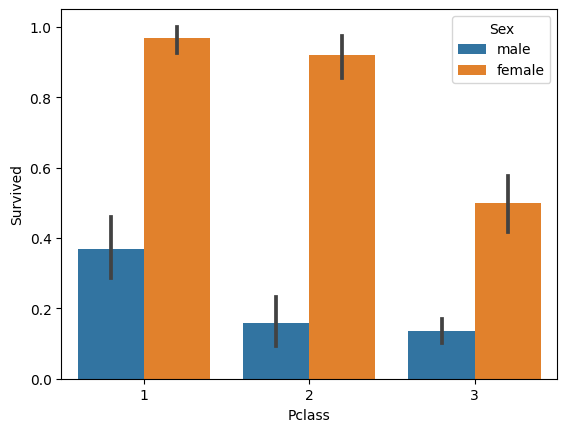

In [11]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

#### 연령대별 생존여부 확인

In [12]:
bins = [0, 5, 12, 18, 25, 35, 60, 80]
labels = ['Baby', 'Child', 'Teenager', 'Young', 'Young Adult', 'Adult', 'Elderly']
titanic_df['Age_ctg'] = pd.cut(bins=bins, labels=labels, x=titanic_df['Age'])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ctg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


<Axes: xlabel='Age_ctg', ylabel='Survived'>

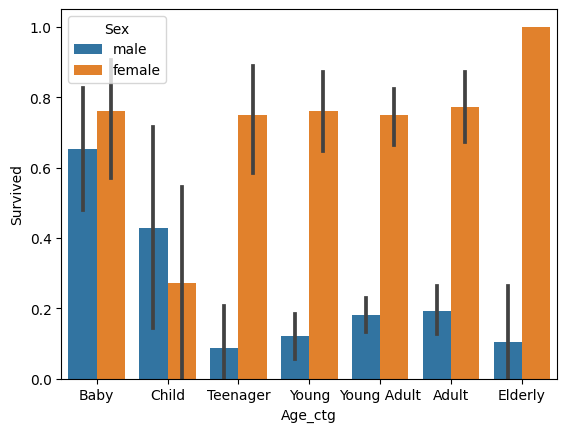

In [13]:
sns.barplot(x='Age_ctg', y='Survived', hue='Sex', data=titanic_df)

In [14]:
titanic_df.drop('Age_ctg', axis=1, inplace=True) # 볼 일 끝났으니 삭제

### 인코딩
- 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 레이블 인코딩 수행 
- 트리 계열의 머신러닝 알고리즘은 숫자의 가중치 특성을 반영하지 않으므로
  - 레이블 인코딩 적용 시 문제 없음  

In [15]:
from sklearn.preprocessing import LabelEncoder

def encode_feature(df_data):
    features = ['Cabin', 'Sex', 'Embarked']
    for feat in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df_data[feat])
        df_data[feat] = encoder.transform(df_data[feat])
    return df_data

encode_feature(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0


### 지금까지 가공한 내용을 정리하고 함수로 작성 (나중에 재사용 가능)

In [16]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Cabin'] = df['Cabin'].str[0]
    df['Embarked'].fillna('N', inplace=True)
    return df

def drop_feature(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def encode_feature(df_data):
    features = ['Cabin', 'Sex', 'Embarked']
    for feat in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df_data[feat])
        df_data[feat] = encoder.transform(df_data[feat])
    return df_data

def transform_feature(df):
    df = fillna(df)
    df = drop_feature(df)
    df = encode_feature(df)
    return df

### (3) 데이터 세트 준비 : 피처 데이터 세트 / 레이블 데이터 세트

In [17]:
# 처음부터
titanic_df = pd.read_csv('data/titanic_train.csv')
labels = titanic_df['Survived']
feature_data = titanic_df.drop('Survived', axis=1)
feature_data = transform_feature(feature_data)
feature_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


### (4) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, labels, test_size=0.2, random_state=2)

### (5) 모델 학습 / 예측 / 평가
- 3개의 ML 알고리즘을 적용하여 모델 학습  
    - 결정 트리 : DecisionTreeClassifier  
    - 랜덤 포레스트 : RandomForestClassifier  
    - 로지스틱 회귀(분류): LogisticRegression  
- 생존자 예측   
- 예측 정확도 평가  
	- 예측된 결과값과 테스트 데이터의 실제 결과값과 비교해서 ML 모델 성능 평가  

### 생존자 예측

3개의 ML 알고리즘 수행
- 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
- 3개의 알고리즘으로 예측 수행

사이킷런 클래스
- 결정 트리 : DecisionTreeClassifier 
- 랜덤 포레스트 : RandomForestClassifier
- 로지스틱 회귀(분류): LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
- 머신러닝 모델을 학습하고(fit()), 예측 수행(predict())
- 예측 성능평가 : 정확도 (accuracy_score() 사용)

### 예측 프로세스에 사용하는 ML 알고리즘

결정 트리 알고리즘
- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내
- 트리 기반의 분류 규칙을 만드는 알고리즘

랜덤 포레스트 알고리즘
- 대표적인 앙상블 알고리즘
- 같은 알고리즘으로 여러 개의 분류기를 만들어서
- 보팅으로 최종 결정하는 알고리즘
    - 보팅(Voting) : 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식  

로지스틱 회귀 알고리즘
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 방식을 기반으로 하되
- 시그모이드 함수를 이용해 분류 수행
    -  시그모이드 함수 : S자 커브 형태  

앙상블 학습 (Ensemble Learning)
- 여러 개의 분류기를 사용해서 예측 결합함으로써  
- 보다 정확한 최종 예측을 도출하는 기법  

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
dt_clf = DecisionTreeClassifier(random_state=2)
rf_clf = RandomForestClassifier(random_state=2)
lr_clf = LogisticRegression(max_iter=1000)

In [21]:
dt_clf.fit(X_train, y_train)
y_predict_df = dt_clf.predict(X_test)

rf_clf.fit(X_train, y_train)
y_predict_rf = rf_clf.predict(X_test)

lr_clf.fit(X_train, y_train)
y_predict_lr = lr_clf.predict(X_test)

DecisionTreeClassifier(random_state=2)

RandomForestClassifier(random_state=2)

LogisticRegression(max_iter=1000)

In [22]:
accuracy_score(y_test, y_predict_df)
accuracy_score(y_test, y_predict_rf)
accuracy_score(y_test, y_predict_lr)

0.7653631284916201

0.7877094972067039

0.776536312849162